# NBA  
**Description:**  
Predict the salary of NBA players building a Neural Net  

**Libraries**

In [18]:
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#sklearn pkg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

## 1. READ AND VIEW INFO
1. LOAD DATASET
1. VIEW THE 10 FIRST ROWS
1. PRINT THE DIMESION
1. GENERAL INFO

In [19]:
df = pd.read_csv('nba_salary_stats.csv')

In [20]:
df.head(10)

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904
5,Jose,Alvarado,NOP,1500000.0,PG,23,54,1,834,131,...,0.679,25,75,100,152,71,7,40,73,330
6,Kyle,Anderson,MEM,9937150.0,PF,28,69,11,1484,209,...,0.638,69,299,368,183,77,45,71,108,521
7,Giannis,Antetokounmpo,MIL,39344970.0,PF,27,67,67,2204,689,...,0.722,134,644,778,388,72,91,219,212,2002
8,Carmelo,Anthony,LAL,2641691.0,PF,37,69,3,1793,319,...,0.830,62,226,288,68,47,52,59,166,919
9,Cole,Anthony,ORL,3449400.0,PG,21,65,65,2059,357,...,0.854,32,316,348,369,46,17,170,171,1062


In [21]:
df.shape

(289, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  289 non-null    object 
 1   last_name   289 non-null    object 
 2   team        289 non-null    object 
 3   salary      289 non-null    float64
 4   pos         289 non-null    object 
 5   age         289 non-null    int64  
 6   g           289 non-null    int64  
 7   gs          289 non-null    int64  
 8   mp          289 non-null    int64  
 9   fg          289 non-null    int64  
 10  fga         289 non-null    int64  
 11  fg%         289 non-null    float64
 12  3p          289 non-null    int64  
 13  3pa         289 non-null    int64  
 14  3p%         289 non-null    float64
 15  2p          289 non-null    int64  
 16  2pa         289 non-null    int64  
 17  2p%         289 non-null    float64
 18  efg%        289 non-null    float64
 19  ft          289 non-null    i

### 1.1 CHECK NULL VALUES

In [23]:
df.isnull().sum()

first_name    0
last_name     0
team          0
salary        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg%           0
3p            0
3pa           0
3p%           0
2p            0
2pa           0
2p%           0
efg%          0
ft            0
fta           0
ft%           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
dtype: int64

### 1.2 Select Numeric columns

In [24]:
numeric_cols = df.select_dtypes(np.number).columns
nba_numeric = df[numeric_cols]
nba_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


## 2. EDA

### 2.1 Basic Statistic

In [25]:
nba_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,289.0,8.972877e+06,1.008679e+07,5318.000,2033160.000,4259259.000,1.242000e+07,4.578097e+07
age,289.0,2.576817e+01,4.378557e+00,19.000,22.000,25.000,2.900000e+01,3.800000e+01
g,289.0,5.661938e+01,1.808104e+01,9.000,47.000,62.000,7.000000e+01,8.200000e+01
gs,289.0,3.041522e+01,2.694710e+01,0.000,5.000,21.000,5.700000e+01,8.000000e+01
mp,289.0,1.373657e+03,6.988331e+02,35.000,799.000,1406.000,1.931000e+03,2.743000e+03
fg,289.0,2.375467e+02,1.645431e+02,3.000,110.000,212.000,3.240000e+02,7.740000e+02
fga,289.0,5.142837e+02,3.476743e+02,13.000,247.000,465.000,7.230000e+02,1.564000e+03
fg%,289.0,4.587301e-01,7.209626e-02,0.231,0.411,0.451,4.960000e-01,6.930000e-01
3p,289.0,7.427682e+01,6.313961e+01,0.000,21.000,57.000,1.150000e+02,2.850000e+02
3pa,289.0,2.083356e+02,1.663823e+02,1.000,70.000,169.000,3.200000e+02,7.500000e+02


### 2.3 Box Plots

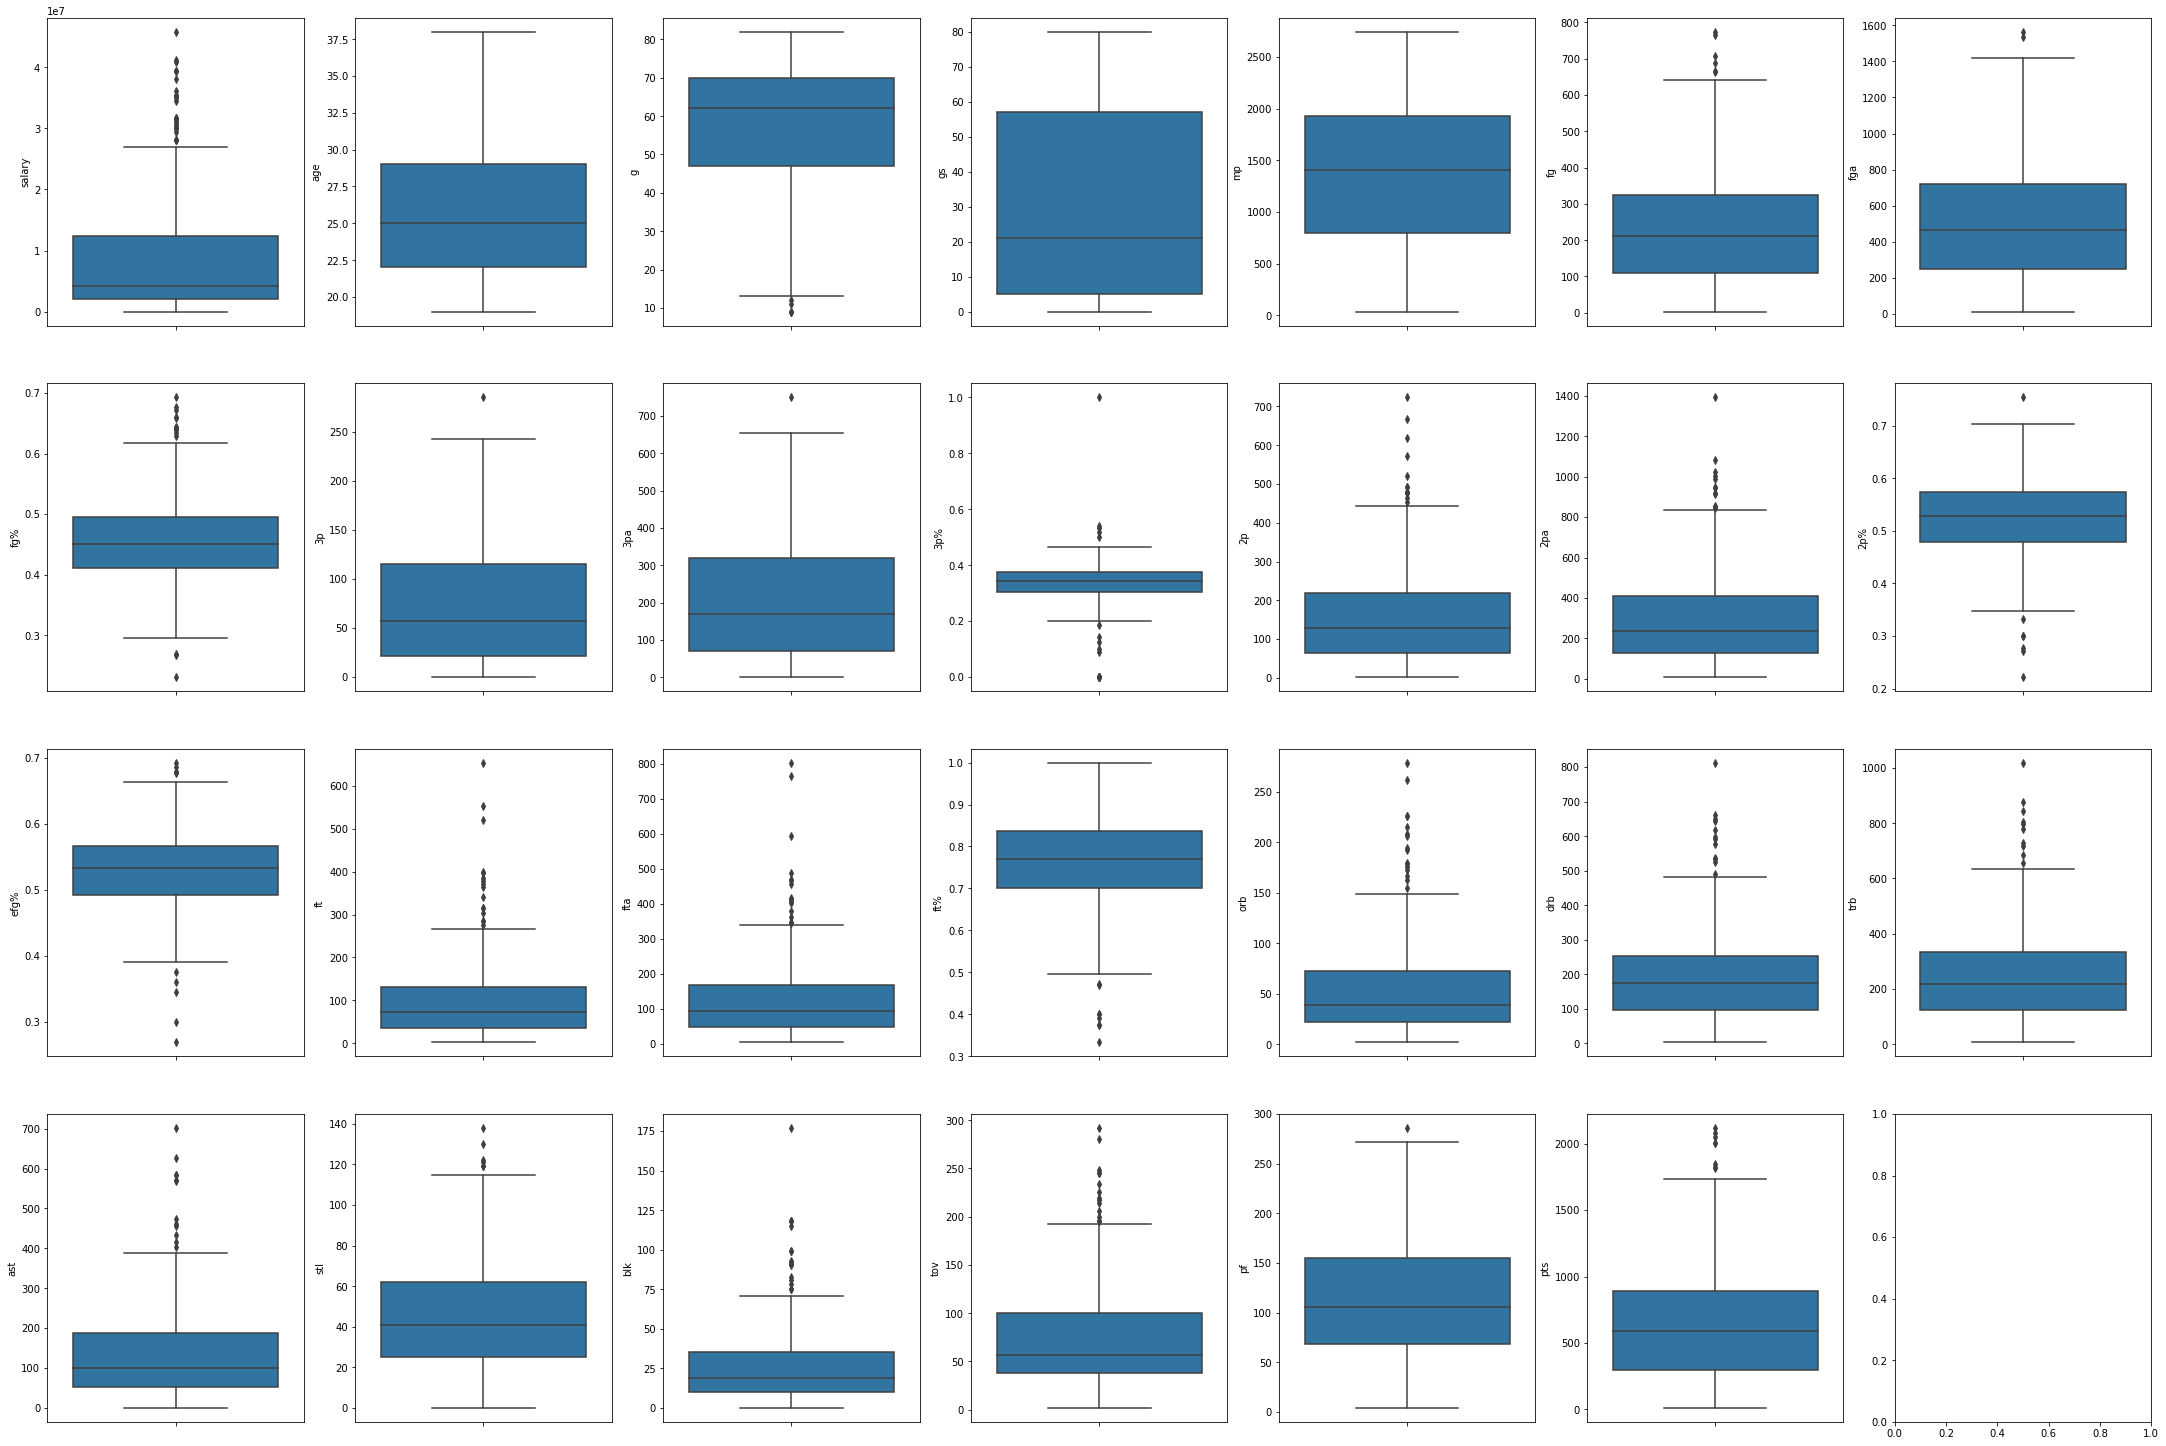

In [26]:
fig, axs = plt.subplots(ncols=7, nrows = 4, figsize = (30,20))
index = 0
axs = axs.flatten()

for k, v in nba_numeric.items():
    sns.boxplot(data = nba_numeric, y = k, ax = axs[index])
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

### 2.4 Histograms

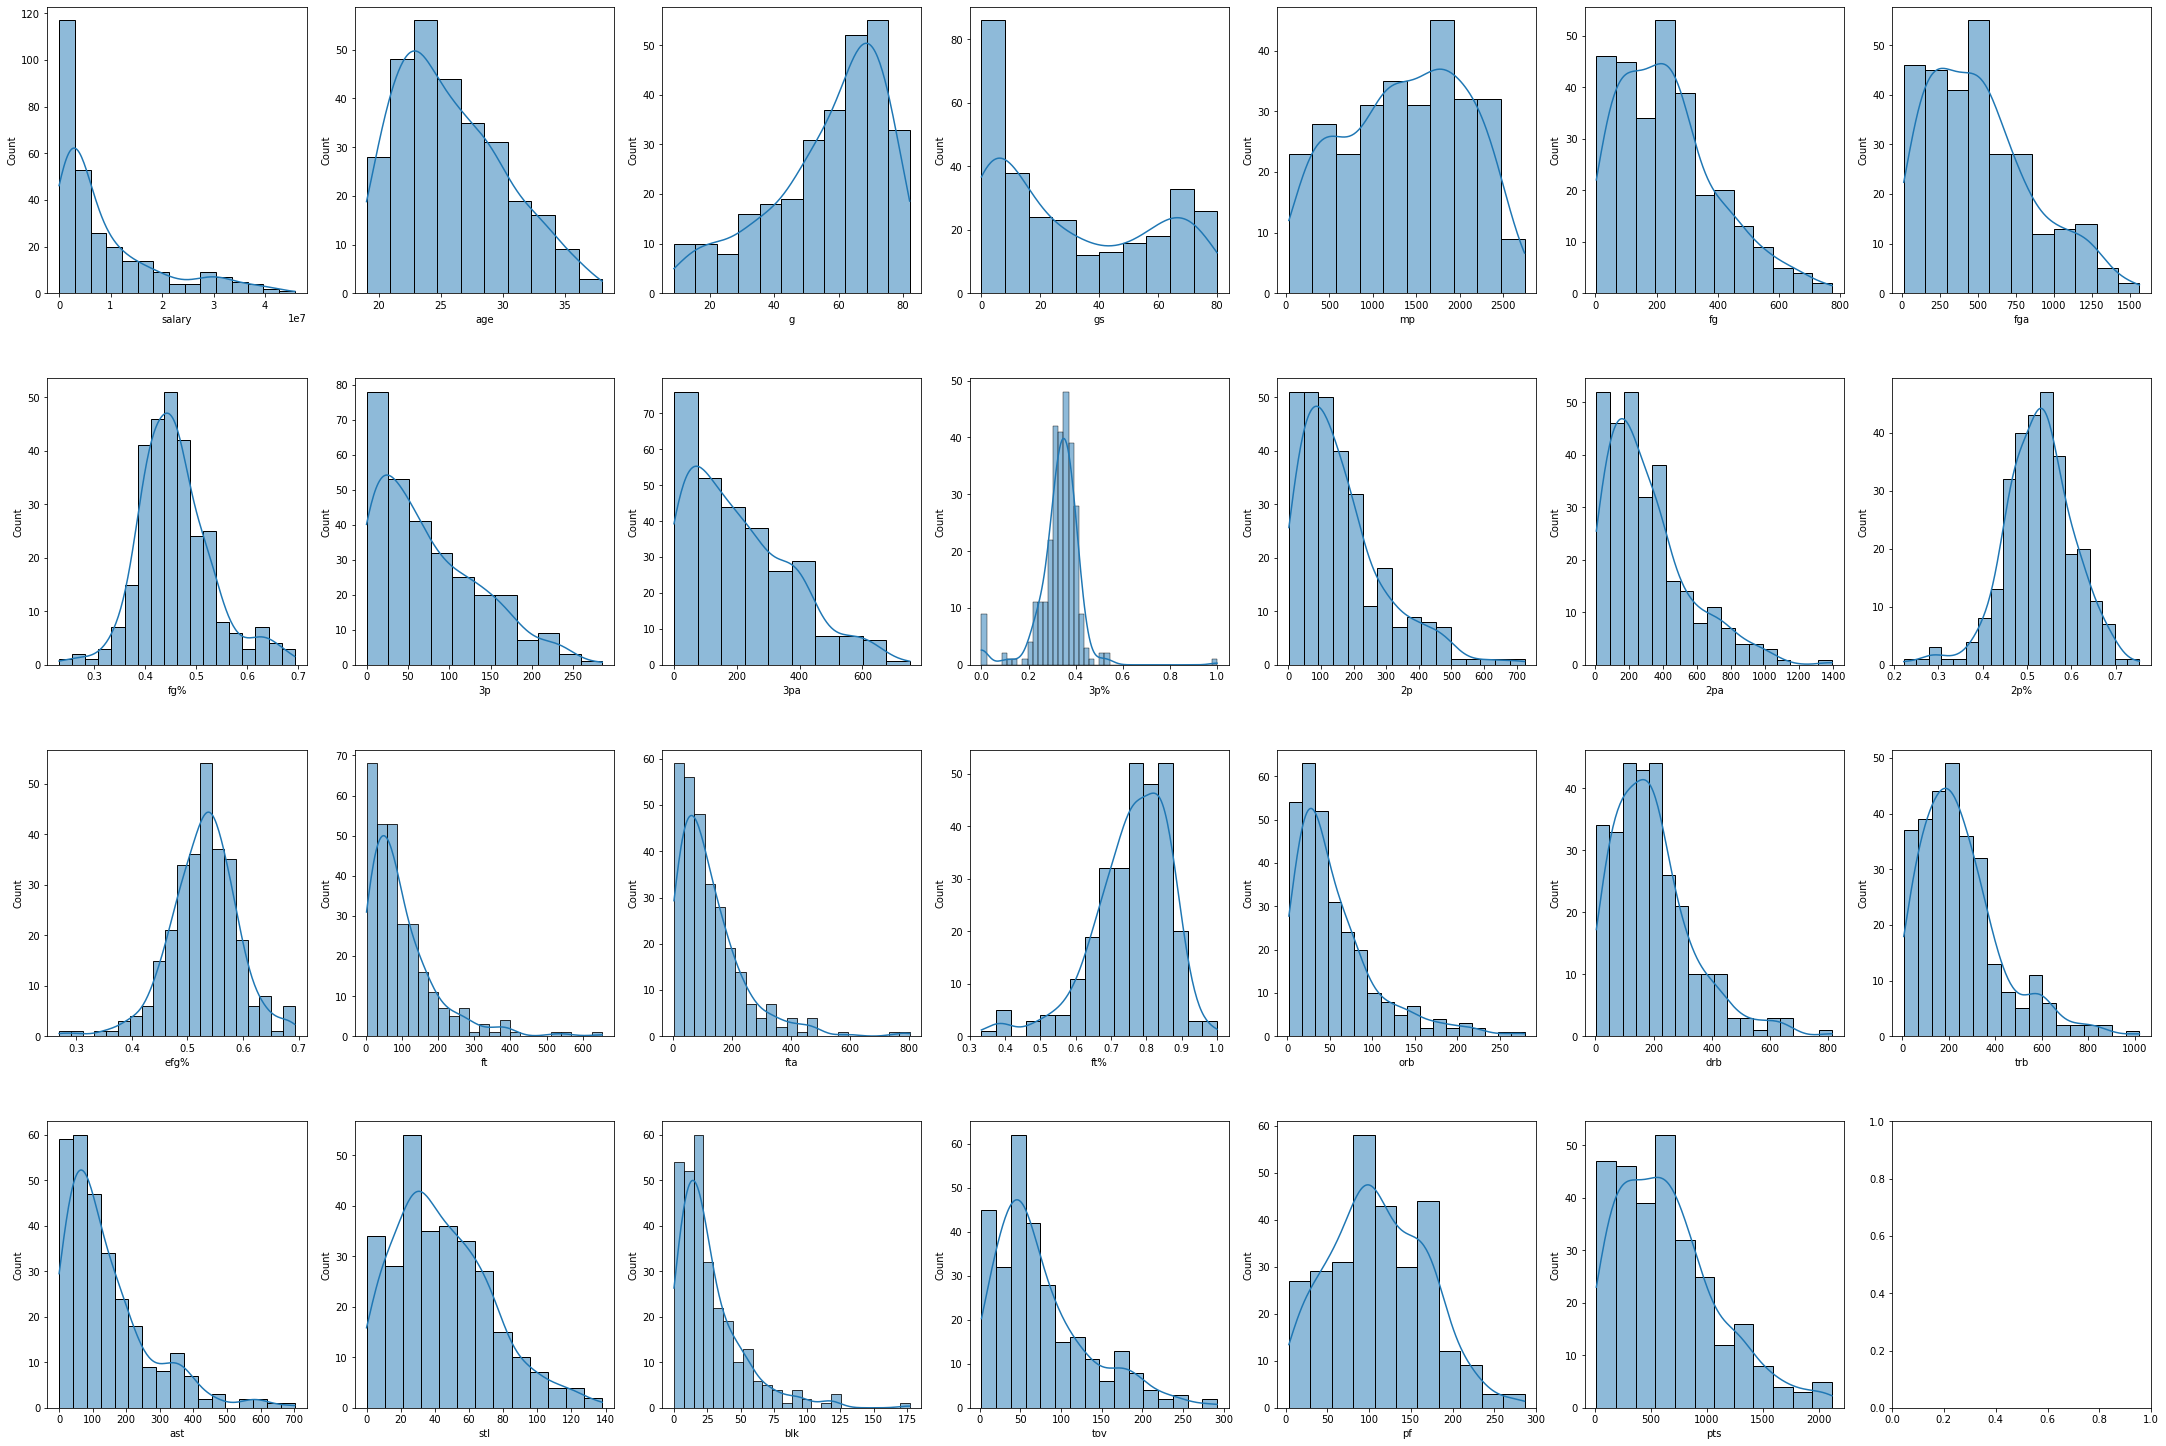

In [27]:
fig, axs = plt.subplots(ncols=7, nrows = 4, figsize = (30,20))
index = 0
axs = axs.flatten()

for k, v in nba_numeric.items():
    sns.histplot(data = nba_numeric, x = k, ax = axs[index], kde=True)
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

### 2.5 Correlations

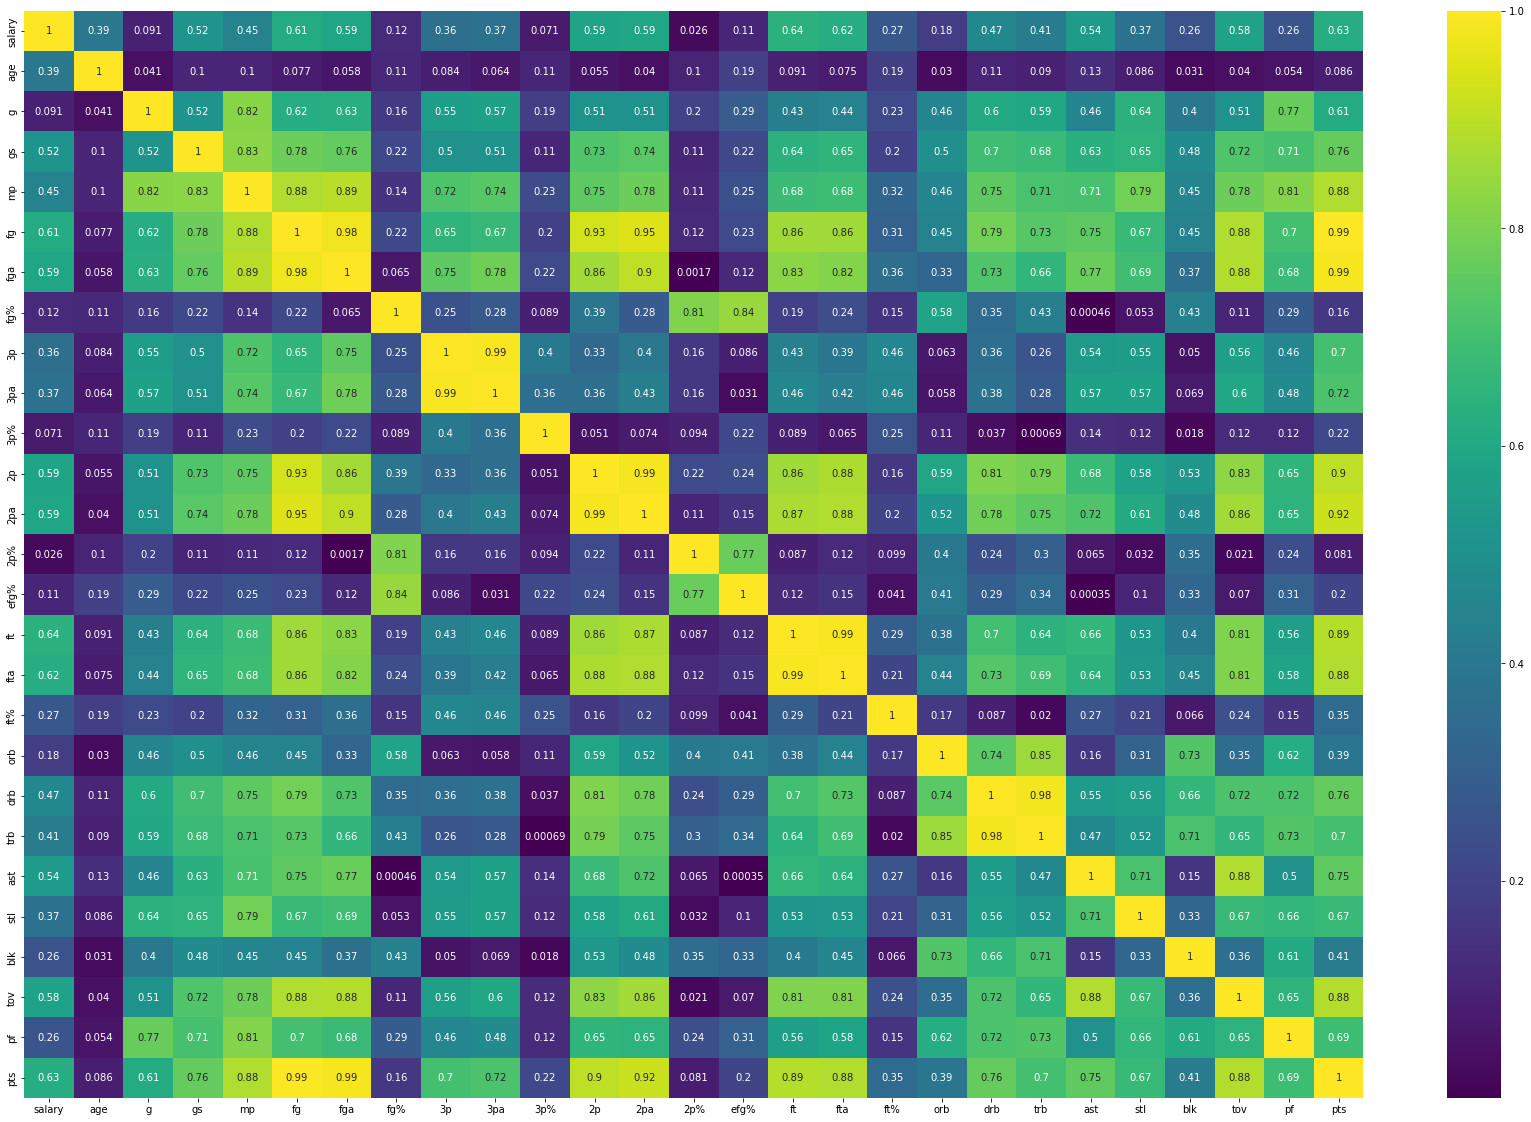

In [28]:
plt.figure(figsize = (30,20))
sns.heatmap(nba_numeric.corr().abs(), cmap='viridis', annot=True)
plt.show()

In [29]:
nba_numeric.corr()['salary'].sort_values(ascending=False)[1:]

ft      0.638887
pts     0.625059
fta     0.623082
fg      0.610400
2pa     0.592708
fga     0.590596
2p      0.585887
tov     0.575348
ast     0.543898
gs      0.516058
drb     0.466429
mp      0.445839
trb     0.411613
age     0.394855
stl     0.374935
3pa     0.371728
3p      0.362786
ft%     0.271927
pf      0.261865
blk     0.256148
orb     0.177829
fg%     0.118489
efg%    0.107579
g       0.091227
3p%     0.070851
2p%     0.025636
Name: salary, dtype: float64

### 2.6 Outliers

In [30]:
for k, v in nba_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    #lower = q1-(1.5*iqr)
    #upper = q3 + (1.5*iqr)
    v_col = v[(v<=q1-1.5 *iqr)|(v>=q3+1.5 *iqr)]
    prec = round(v_col.shape[0]*100/nba_numeric.shape[0], 2)
    print('{} outliers = {}%'.format(k, prec))

salary outliers = 9.69%
age outliers = 0.0%
g outliers = 1.73%
gs outliers = 0.0%
mp outliers = 0.0%
fg outliers = 2.08%
fga outliers = 0.69%
fg% outliers = 4.84%
3p outliers = 0.35%
3pa outliers = 0.35%
3p% outliers = 6.57%
2p outliers = 4.5%
2pa outliers = 4.15%
2p% outliers = 2.42%
efg% outliers = 3.81%
ft outliers = 5.54%
fta outliers = 5.54%
ft% outliers = 2.77%
orb outliers = 5.54%
drb outliers = 4.15%
trb outliers = 3.46%
ast outliers = 4.15%
stl outliers = 2.08%
blk outliers = 5.54%
tov outliers = 4.84%
pf outliers = 0.35%
pts outliers = 2.77%


## 3. Normalize data

In [31]:
df.columns

Index(['first_name', 'last_name', 'team', 'salary', 'pos', 'age', 'g', 'gs',
       'mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', '2p', '2pa', '2p%',
       'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts'],
      dtype='object')

In [32]:
ct = make_column_transformer((MinMaxScaler(), 
                             ["age", "g", "gs", "mp", "fg", "fga", "fg%", 
                              "3p", "3pa", "3p%", "2p", "2pa", 
                              "2p%", "efg%", "ft", "fta", "ft%", "orb", 
                              "drb", "trb", "ast", 
                              "stl", "blk", "tov", "pf", "pts"]),
                             (OneHotEncoder(), ['team', 'pos'])
                                                        
                            )

## 4. Split data

#### 4.1 Features and response

In [33]:
X = df.drop(['first_name', 'last_name', 'salary'], axis =1)
y = df['salary']
X.shape, y.shape

((289, 28), (289,))

#### 4.2 Train and test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

## 5. Transform Training and test data

In [35]:
X_train_norm = ct.fit_transform(X_train)
X_test_norm = ct.transform(X_test)

## 6. Build Neural Net

In [36]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

In [53]:
model = Sequential()
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(1))

In [59]:
model.compile(optimizer='adam', loss=tf.keras.metrics.mae, metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               6200      
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 1)                 101       
                                                                 
Total params: 26,501
Trainable params: 26,501
Non-trainable params: 0
_________________________________________________________________


In [60]:
fit_data = model.fit(X_train_norm, y_train,  epochs=100, verbose=0)

In [61]:
#evalue model
val_loss, val_mae = model.evaluate(X_test_norm, y_test)

2/2 [==============================] - 1s 7ms/step - loss: 4248306.0000 - mae: 4248306.0000


In [70]:
fit_data.history.keys()

dict_keys(['loss', 'mae'])

<AxesSubplot:ylabel='loss'>

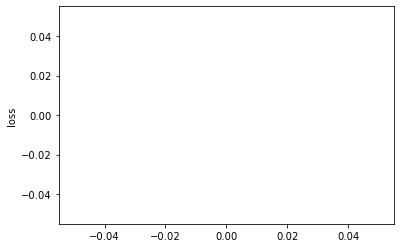

In [75]:
sns.lineplot(data =fit_data.history, y = 'loss')